# Nivell 1









## Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fly = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 2/S02 T05 Exploració de les dades/DelayedFlights.csv')

In [4]:
fly.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [3]:
fly['retard'] = fly['ArrDelay'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
fly.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,retard
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1


In [5]:
fly['retard'].isna().sum()

0

In [6]:
fly['ArrDelay'].isna().sum()

8387

In [4]:
#Eliminamos NaNs de ArrDelay
fly = fly.dropna(subset = ['ArrDelay'])

In [5]:
fly['ArrDelay'].isna().sum()

0

In [5]:
fly2 = fly.sample(n = 100000, random_state = 42)

In [7]:
fly2.isna().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         35303
WeatherDelay         35303
NASDelay             35303
SecurityDelay        35303
LateAircraftDelay    35303
retard                   0
dtype: int64

Com retard no ha heredat els NaNs de Arrdelay eliminem les files amb NaNs de la nostra mostra

In [8]:
fly2.retard.value_counts()

1    89517
0    10483
Name: retard, dtype: int64

Igual que en l'exercici anterior eliminem els NaNs de CarrierDelay, WeatherDelay, NASDelay, SecurityDelay i LateAircraftDelay amb la mitjana.

In [6]:
numVar = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay','Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
catVar = ['UniqueCarrier', 'TailNum','Origin', 'Dest']

flyNum = fly2.loc[:, numVar]
flyCat = fly2.loc[:,catVar]
retards = fly2.loc[:, 'retard']

In [10]:
flyNum.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
403778,3,25,2,1124.0,1115,1221.0,1215,1095,57.0,60.0,...,6.0,9.0,251,5.0,7.0,NaN,NaN,NaN,NaN,NaN
1397595,8,9,6,1152.0,1130,1555.0,1520,1690,183.0,170.0,...,35.0,22.0,1121,7.0,23.0,22.0,0.0,13.0,0.0,0.0
1849546,12,13,6,1226.0,1210,1405.0,1355,5615,99.0,105.0,...,10.0,16.0,528,7.0,13.0,NaN,NaN,NaN,NaN,NaN
18418,1,21,1,2046.0,1950,2158.0,2045,1274,132.0,115.0,...,73.0,56.0,629,4.0,25.0,7.0,0.0,17.0,0.0,49.0
1805454,12,26,5,1759.0,1709,2026.0,1937,6180,87.0,88.0,...,49.0,50.0,495,3.0,13.0,0.0,0.0,0.0,0.0,49.0


In [11]:
flyCat.head()

,UniqueCarrier,TailNum,Origin,Dest
403778,WN,N909WN,STL,MDW
1397595,AA,N5ELAA,DFW,MIA
1849546,EV,N752EV,CAK,ATL
18418,WN,N642WN,DEN,LAS
1805454,OO,N742SK,DEN,OKC


In [12]:
print(flyNum.shape)
print(flyCat.shape)

(100000, 21)
(100000, 4)


In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

flyTemp = imp.fit_transform(flyNum)

flyNum = pd.DataFrame(flyTemp, columns = numVar)

print(flyNum.isna().sum())

flyNum.head()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3.0,25.0,2.0,1124.0,1115.0,1221.0,1215.0,1095.0,57.0,60.0,...,6.0,9.0,251.0,5.0,7.0,2.0,0.0,2.0,0.0,8.0
1,8.0,9.0,6.0,1152.0,1130.0,1555.0,1520.0,1690.0,183.0,170.0,...,35.0,22.0,1121.0,7.0,23.0,22.0,0.0,13.0,0.0,0.0
2,12.0,13.0,6.0,1226.0,1210.0,1405.0,1355.0,5615.0,99.0,105.0,...,10.0,16.0,528.0,7.0,13.0,2.0,0.0,2.0,0.0,8.0
3,1.0,21.0,1.0,2046.0,1950.0,2158.0,2045.0,1274.0,132.0,115.0,...,73.0,56.0,629.0,4.0,25.0,7.0,0.0,17.0,0.0,49.0
4,12.0,26.0,5.0,1759.0,1709.0,2026.0,1937.0,6180.0,87.0,88.0,...,49.0,50.0,495.0,3.0,13.0,0.0,0.0,0.0,0.0,49.0


Igual que en el cas anterior apliquem RobustScaler i normalitzem

In [8]:
import sklearn.preprocessing as sklp

scaler = sklp.RobustScaler()

fly2NTemp = scaler.fit_transform(flyNum)

minmax = sklp.MinMaxScaler()

fly2NTemp = minmax.fit_transform(fly2NTemp)

flyNum2 = pd.DataFrame(data = fly2NTemp, columns = numVar)

print(flyNum2.shape)
flyNum2.head()

(100000, 21)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.181818,0.800000,0.166667,0.468112,0.472434,0.508545,0.514843,0.112332,0.064417,0.066874,...,0.038089,0.001980,0.044616,0.028902,0.018919,0.001434,0.0,0.001552,0.0,0.013769
1,0.636364,0.266667,0.833333,0.479783,0.478796,0.647770,0.644190,0.173426,0.257669,0.237947,...,0.058172,0.010561,0.221050,0.040462,0.062162,0.015771,0.0,0.010085,0.0,0.000000
2,1.000000,0.400000,0.833333,0.510629,0.512723,0.585244,0.574215,0.576445,0.128834,0.136858,...,0.040859,0.006601,0.100791,0.040462,0.035135,0.001434,0.0,0.001552,0.0,0.013769
3,0.000000,0.666667,0.000000,0.852439,0.826548,0.899125,0.866836,0.130712,0.179448,0.152411,...,0.084488,0.033003,0.121274,0.023121,0.067568,0.005018,0.0,0.013189,0.0,0.084337
4,1.000000,0.833333,0.666667,0.732805,0.724343,0.844102,0.821035,0.634459,0.110429,0.110420,...,0.067867,0.029043,0.094099,0.017341,0.035135,0.000000,0.0,0.000000,0.0,0.084337


Ara apliquem dummies a les variables categoriques



In [9]:
flyCat2 = pd.get_dummies(data = flyCat, prefix = ['UC-', 'TN-', 'O-', 'D-'])

print(flyCat2.shape)

(100000, 5812)


In [30]:
flyCat2.head()

,UC-_9E,UC-_AA,UC-_AQ,UC-_AS,UC-_B6,UC-_CO,UC-_DL,UC-_EV,UC-_F9,UC-_FL,...,D-_TXK,D-_TYR,D-_TYS,D-_VLD,D-_VPS,D-_WRG,D-_XNA,D-_YAK,D-_YKM,D-_YUM
1782417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877634,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#flyCat2.shape
a = flyCat2.reset_index(drop=True)

In [17]:
a.head()

,UC-_9E,UC-_AA,UC-_AQ,UC-_AS,UC-_B6,UC-_CO,UC-_DL,UC-_EV,UC-_F9,UC-_FL,...,D-_TYR,D-_TYS,D-_VLD,D-_VPS,D-_WRG,D-_WYS,D-_XNA,D-_YAK,D-_YKM,D-_YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
a.shape

(100000, 5812)

In [11]:
df = pd.merge(flyNum2, a, left_index=True, right_index=True)
#df = pd.concat([flyNum2, a], axis=1)

In [20]:
df.shape

(100000, 5833)

In [21]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,D-_TYR,D-_TYS,D-_VLD,D-_VPS,D-_WRG,D-_WYS,D-_XNA,D-_YAK,D-_YKM,D-_YUM
0,0.181818,0.800000,0.166667,0.468112,0.472434,0.508545,0.514843,0.112332,0.064417,0.066874,...,0,0,0,0,0,0,0,0,0,0
1,0.636364,0.266667,0.833333,0.479783,0.478796,0.647770,0.644190,0.173426,0.257669,0.237947,...,0,0,0,0,0,0,0,0,0,0
2,1.000000,0.400000,0.833333,0.510629,0.512723,0.585244,0.574215,0.576445,0.128834,0.136858,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.666667,0.000000,0.852439,0.826548,0.899125,0.866836,0.130712,0.179448,0.152411,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.833333,0.666667,0.732805,0.724343,0.844102,0.821035,0.634459,0.110429,0.110420,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(flyCat2.shape)
print(flyNum2.shape)
print(df.shape)

(100000, 5812)
(100000, 21)
(100000, 5833)


Com tenim un dataset amb un total de 5833 columnes passem a reduir-lo aplicant una PCA

### PCA

In [12]:
retards = retards.reset_index(drop=True)
retards

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: retard, Length: 100000, dtype: int64

In [25]:
retards.value_counts()

1    89517
0    10483
Name: retard, dtype: int64

In [28]:
from sklearn.decomposition import PCA

#pca = PCA(.95)#Retenga el 95% de la informacióm

pca = PCA().fit(df)

MemoryError: Unable to allocate 4.35 GiB for an array with shape (100000, 5833) and data type float64

Reduïm la mostra per intentar processar la PCA

In [13]:
df2 = pd.merge(df, retards, left_index=True, right_index=True)
df2.shape

(100000, 5834)

In [14]:
dfReduct = df2.sample(n=10000, random_state=42)
dfReduct.shape

(10000, 5834)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(.95)
retardsReduct = dfReduct.loc[:,'retard']

In [17]:
dfReduct = dfReduct.drop('retard', axis=1)

In [18]:
pca.fit(dfReduct)
dfPCA = pca.transform(dfReduct)

In [19]:
dfPCA.shape

(10000, 2664)

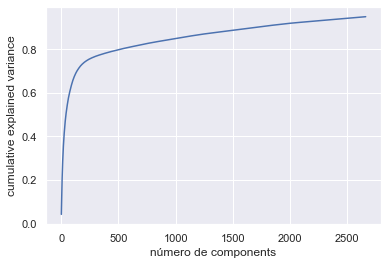

In [20]:
sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de components')
plt.ylabel('cumulative explained variance')
plt.show()

Un cop reduit el número de variables mirem com de desbalancejats estan els models

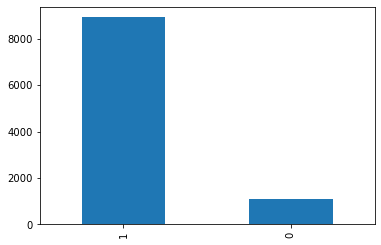

In [39]:
retardsReduct.value_counts().plot(kind='bar')
plt.show()

Com el model està molt desbalancejat convé equilibar-lo (Cal dividir primer el dataset i després rebalancejar). 

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dfPCA, retardsReduct, test_size = 0.25, random_state = 42)

print(x_train.shape, '\n', y_train.shape, '\n', x_test.shape, '\n', y_test.shape)

(7500, 2664) 
 (7500,) 
 (2500, 2664) 
 (2500,)


Com el dataset és molt gran una opció seria agafar més mostra. Però degut als problemes de memòria serà una millor opció generar dades noves a partir de la PCA amb SMOUT

In [43]:
y_train.value_counts()

1    6691
0     809
Name: retard, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

In [23]:
y_resampled.value_counts()

1    6691
0    6691
Name: retard, dtype: int64

In [46]:
print(imblearn.__version__)# No sé si m'he de preocupar que això funcioni o no

NameError: name 'imblearn' is not defined

Amb tots els processos realitzats hem escalat les variables, reduït les dimensions del dataframe i en el cas del test que hi hagi la mateixa proporció de vols amb retard i sense. Ara passem a aplicar els models.

### Models a aplicar

* Decision tree
* Suport vector machine 
* Logistic regression

In [25]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
tree = dtc.fit(x_resampled, y_resampled)
tree_predict = tree.predict(x_test)

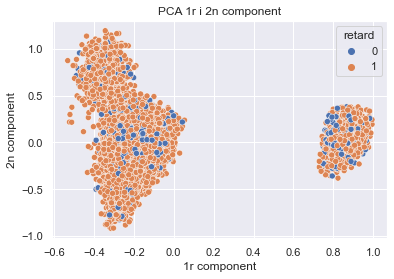

In [33]:
#SVM

sns.scatterplot(x=dfPCA[:,0], y=dfPCA[:,1], hue=retardsReduct )
plt.xlabel('1r component')
plt.ylabel('2n component')
plt.title('PCA 1r i 2n component')
plt.show()

La gràfica mostra que hi han dos grups diferenciats però no sembla que amb els dos primers components sigui degut els grups pels retards. Igualment s'intentarà separar-los per SVG amb kernel lineal

In [34]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_resampled, y_resampled)
svm_predict = clf.predict(x_test)

In [35]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_resampled, y_resampled)

logreg_predict = logreg.predict(x_test)

C:\Users\Guillermo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(logreg_predict.shape)
print(x_test.shape)

(2500,)
(2500, 2664)


Ignorarem l'alerta degut a que a les dades ja hem aplicat un robust scaler i han sigut normalitzades. Tot i així, al no poder fer prou iteracions pot donar un resultat dolent

## Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [44]:
from sklearn import metrics
#Accuracy
print('decision tree', metrics.accuracy_score(y_test, tree_predict))
print('SVM', metrics.accuracy_score(y_test, svm_predict))
print('Logistic regression', metrics.accuracy_score(y_test, logreg_predict))

decision tree 0.842
SVM 0.8396
Logistic regression 0.824


### Matriu de confiança

In [47]:
#Decisiont tree
tree_matrix = metrics.confusion_matrix(y_test, tree_predict)
tree_matrix

array([[ 145,  121],
       [ 274, 1960]], dtype=int64)

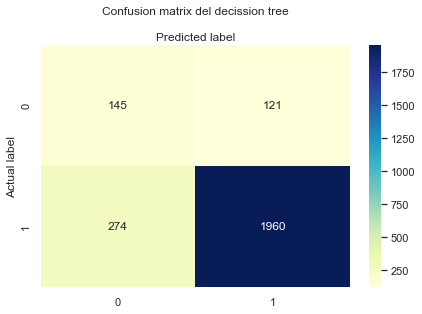

In [50]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(tree_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix del decission tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
# SVM
svm_matrix = metrics.confusion_matrix(y_test, svm_predict)
svm_matrix

array([[ 147,  119],
       [ 282, 1952]], dtype=int64)

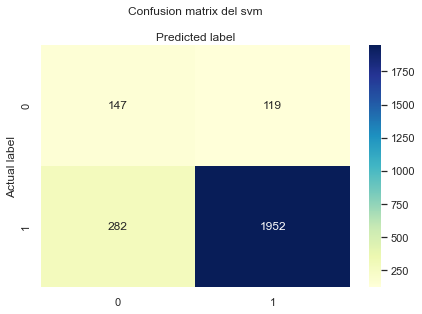

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(svm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix del svm', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
#Logistic regression
lgr_matrix = metrics.confusion_matrix(y_test,logreg_predict)
lgr_matrix

array([[ 149,  117],
       [ 323, 1911]], dtype=int64)

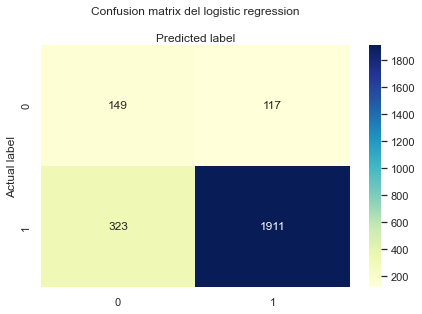

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lgr_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix del logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
data = {'models':['tree', 'SVM','logreg'],
        'TP': [tree_matrix[1,1], svm_matrix[1,1], lgr_matrix[1,1]],
        'FP': [tree_matrix[0,1], svm_matrix[0,1], lgr_matrix[0,1]],
        'TN':[tree_matrix[0,0], svm_matrix[0,0], lgr_matrix[0,0]],
        'FN': [tree_matrix[1,0], svm_matrix[1,0], lgr_matrix[1,0]]
       }
resum = pd.DataFrame(data = data)
resum

,models,TP,FP,TN,FN
0,tree,1960,121,145,274
1,SVM,1952,119,147,282
2,logreg,1911,117,149,323


In [84]:
def clasif_statistic(df):
    for index, row in resum.iterrows():
        print()
        precision = row[1]/(row[1]+row[2])
        sensitivity = row[1]/(row[1]+row[4])
        specificity = row[3]/(row[3]+row[2])
        print(row[0], 'Precission = ', round(precision,3))
        print(row[0], 'Sensitivity = ', round(sensitivity,3))
        print(row[0], 'Specificity = ', round(specificity,3))
   
    
  

In [85]:
clasif_statistic(resum)


tree Precission =  0.942
tree Sensitivity =  0.877
tree Specificity =  0.545

SVM Precission =  0.943
SVM Sensitivity =  0.874
SVM Specificity =  0.553

logreg Precission =  0.942
logreg Sensitivity =  0.855
logreg Specificity =  0.56


Veiem que en general la precisió i l'assignació de positius és millor que la de negatius. Sent els millors models decision tree i SVM.

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.


In [90]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dtc2 = DecisionTreeClassifier(criterion = 'entropy')
tree2 = dtc2.fit(x_resampled, y_resampled)
tree_predict2 = tree2.predict(x_test)

metrics.accuracy_score(y_test, tree_predict2)
matrix = metrics.confusion_matrix(y_test,tree_predict2)



In [94]:
def clasif_statistic2(m):    
        precision = m[1,1]/(m[1,1]+m[0,1])
        sensitivity = m[1,1]/(m[1,1]+m[1,0])
        specificity = m[0,0]/(m[0,0]+m[0,1])
        print('TP: ', m[1,1])
        print('TN: ', m[0,0])
        print('FP: ', m[0,1])
        print('FN: ', m[1,0])
        print('Precission = ', round(precision,3))
        print('Sensitivity = ', round(sensitivity,3))
        print('Specificity = ', round(specificity,3))
 
clasif_statistic2(matrix)
print('accuracy: ', metrics.accuracy_score(y_test, tree_predict2))

TP:  1959
TN:  163
FP:  103
FN:  275
Precission =  0.95
Sensitivity =  0.877
Specificity =  0.613
accuracy:  0.8488


In [95]:
clf2 = svm.SVC(kernel='rbf', gamma = 0.1)
clf2.fit(x_resampled, y_resampled)
svm_predict2 = clf2.predict(x_test)

metrics.accuracy_score(y_test, svm_predict2)
matrixSVM = metrics.confusion_matrix(y_test,svm_predict2)

clasif_statistic2(matrixSVM)
print('accuracy: ', metrics.accuracy_score(y_test, svm_predict2))

TP:  2109
TN:  65
FP:  201
FN:  125
Precission =  0.913
Sensitivity =  0.944
Specificity =  0.244
accuracy:  0.8696


In [100]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(solver = 'saga')

logreg2.fit(x_resampled, y_resampled)

logreg_predict2 = logreg2.predict(x_test)

matrix_lgrg = metrics.confusion_matrix(y_test, logreg_predict2)
clasif_statistic2(matrix_lgrg)
print('accuracy: ', metrics.accuracy_score(y_test, svm_predict2))

TP:  1911
TN:  149
FP:  117
FN:  323
Precission =  0.942
Sensitivity =  0.855
Specificity =  0.56
accuracy:  0.8696


## Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

S'utilitzarà cross-validation en els models emprats en l'exercici 1

In [102]:
from sklearn.model_selection import cross_val_score

#Decision tree

scores_tree = cross_val_score(dtc, x_train, y_train, cv=5)
print(scores_tree)
print('mitja', scores_tree.mean())
print('sd', scores_tree.std())

[0.86733333 0.86533333 0.86666667 0.87266667 0.86133333]
mitja 0.8666666666666666
sd 0.003651483716701135


In [103]:
#SVC

scores_SVC = cross_val_score(clf, x_train, y_train, cv=5)
print(scores_SVC)
print('mitja ', scores_SVC.mean())
print('std ', scores_SVC.std())


[0.88666667 0.89133333 0.88866667 0.88133333 0.882     ]
mitja  0.8859999999999999
std  0.003841296077570124


In [104]:
#Logistic regression, utilitzem el cas de l'exercici 2 perquè no ha donat
#cap alerta

scores_logreg2 = cross_val_score(logreg2, x_train, y_train, cv=5)
print(scores_logreg2)
print('mean: ', scores_logreg2.mean())
print('std: ', scores_logreg2.std())



[0.89333333 0.89333333 0.894      0.89066667 0.89133333]
mean:  0.8925333333333334
std:  0.0012927146286443427


En tots els casos s'obtenen valors per sobre del 80% d'accuracy amb una dispersió molt petita.